# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



In [1]:
# in case the following packages are missing please pip install them
# the following package will accelarate scikit-learn algorithms execution on Intel silicon
# !pip install scikit-learn-intelex

### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
pio.renderers.default = "svg"

# init_notebook_mode(connected=True)

In [3]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

from the `info` we can see that:
* No null values (no need for data implutation)
* We need to encode features 1-9 (Object type) and the target feature `y`

In [5]:
df.head(100)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,45,services,married,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
96,42,management,married,university.degree,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
97,53,admin.,divorced,university.degree,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
98,37,technician,single,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


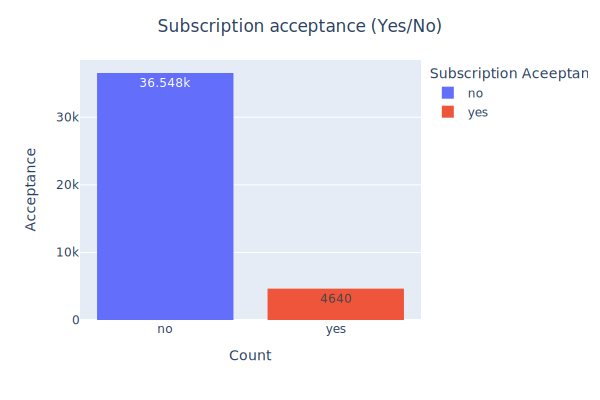

In [6]:
fig = px.histogram(df, x='y', color='y', text_auto=True,
                   labels={"y": "Subscription Aceeptance"})
fig.update_layout(title='Subscription acceptance (Yes/No)',
                  title_x=0.5, title_y=0.95,
                  width=600, height=400,
                  yaxis_title='Acceptance',
                  xaxis_title='Count')
fig.show()

We can see that positive acceptance of subscription was 4.6K vs 36.5K that rejected the subscription. This means that there's a clear bias coming from the data and we'll need to take that into consideration when choosing the optimal model for this problem.


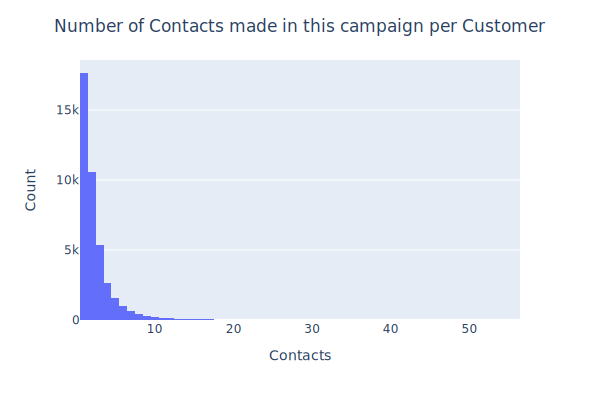

In [7]:
fig = px.histogram(df[['campaign']].value_counts(), y='count', x=df['campaign'].value_counts().index, nbins=60)
fig.update_layout(title='Number of Contacts made in this campaign per Customer',
                  title_x=0.5, title_y=0.95,
                  width=600, height=400,
                  xaxis_title='Contacts',
                  yaxis_title='Count')

We can see that most of customers were contacted less than 5 times during the last campaign.

In [8]:
# encoding categorical target column to numeric
df['y'] = df['y'].map({'no': 0, 'yes': 1})

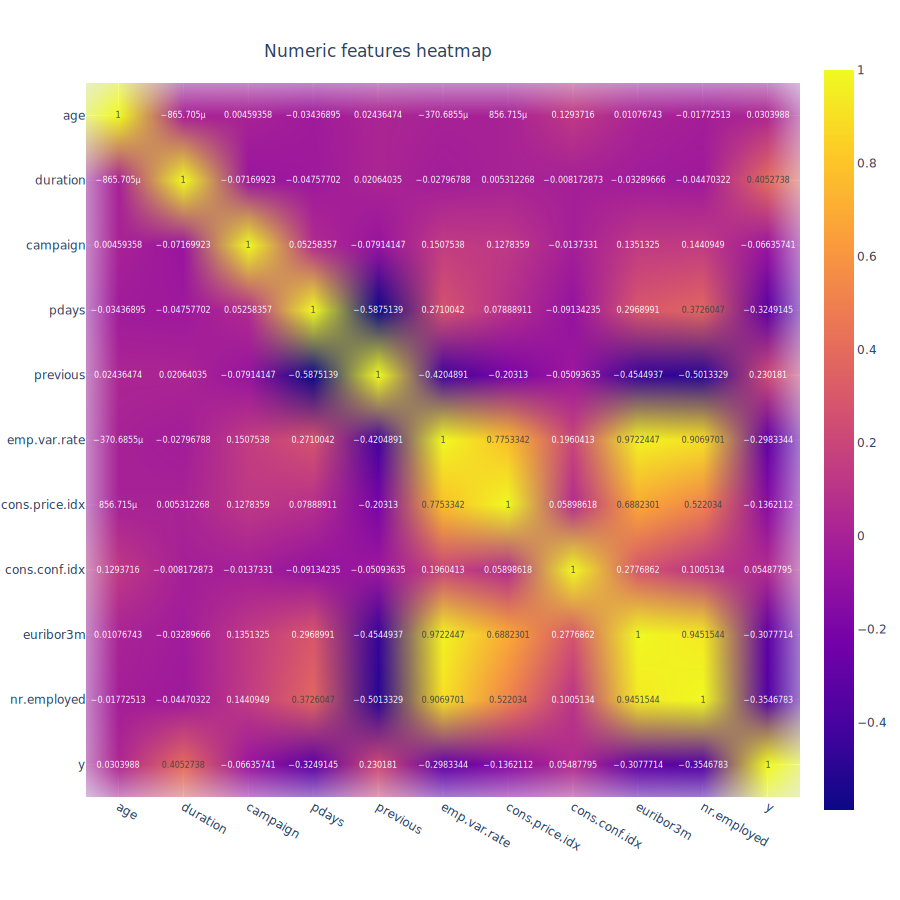

In [38]:
pio.renderers.default = "svg"
df_numeric = df.select_dtypes(include=np.number)
fig = px.imshow(df_numeric.corr(), text_auto=True)
fig.update_layout(title='Numeric features heatmap',
                  title_x=0.42, title_y=0.95,
                  width=900, height=900)
fig.show('svg')

We can see a stronger correlation between y and [duration, previous, pdays, emp.var.rate, euribor3m, nr.employed]. As pointed out for `duration` on the features info, this can be caused from 0 seconds for calls that were rejected ot weren't answered.

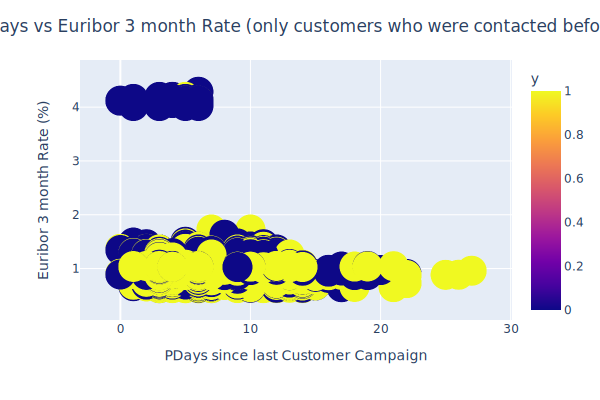

In [39]:
pio.renderers.default = "svg"
fig = px.scatter(df[df['pdays'] < 999], x='pdays', y='euribor3m', color='y')
fig.update_traces(marker=dict(size=30))
fig.update_layout(title='PDays vs Euribor 3 month Rate\n(only customers who were contacted before)',
                  title_x=0.5, title_y=0.95,
                  width=600, height=400,
                  yaxis_title='Euribor 3 month Rate (%)',
                  xaxis_title='PDays since last Customer Campaign')
fig.show('svg')

High interest rates (>3.5%) led to lower acceptance of subscriptions. High number of previous days (>20) since last timne customer was offered with campaign led to lower acceptance of subscriptions.

In [11]:
# helper function to generate ratio acceptance DataFrame
def get_acceptance_dataframe(mydf, category):
    df_all = mydf.groupby(category).agg('count')['y']
    df_category_accepted = mydf.query('y == 1').groupby(category).agg('count')['y']
    df_category_rejected = mydf.query('y == 0').groupby(category).agg('count')['y']
    category_accepted_ratio = df_category_accepted / df_all
    category_rejected_ratio = 1 - category_accepted_ratio
    categoty_acceptance_frame = {'Accepted': category_accepted_ratio,
         'Rejected': category_rejected_ratio}
    cat_frame = pd.DataFrame(categoty_acceptance_frame)
    return cat_frame

# calculates the acceptance rate given a dataframe
def get_acceptance_rate(df):
    return len(df.query('y == 1')) / len(df)

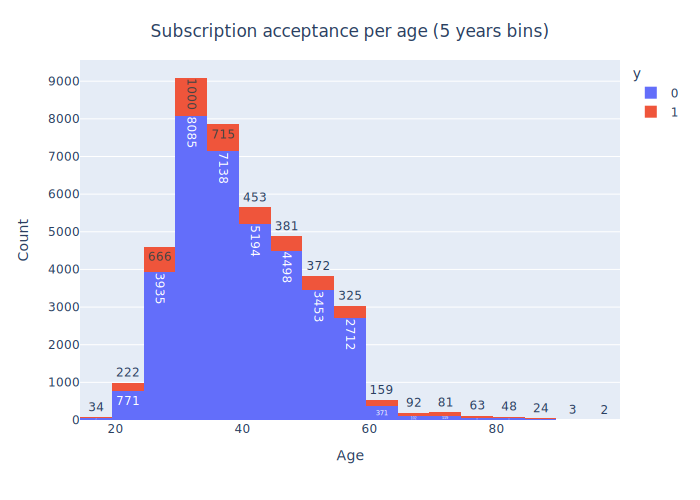

In [12]:
fig = px.histogram(df, x='age', color='y', nbins=20, text_auto='.0f')
fig.update_layout(title='Subscription acceptance per age (5 years bins)',
                  title_x=0.5, title_y=0.95,
                  yaxis_title='Count',
                  xaxis_title='Age')
fig.show()

In [13]:
# Explore categorical unique values
X_cat = df.iloc[:, 1:8]
X_cat.T.apply(lambda x: print(x.unique()), axis=1)

['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
['married' 'single' 'divorced' 'unknown']
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
['no' 'unknown' 'yes']
['no' 'yes' 'unknown']
['no' 'yes' 'unknown']
['telephone' 'cellular']


job          None
marital      None
education    None
default      None
housing      None
loan         None
contact      None
dtype: object

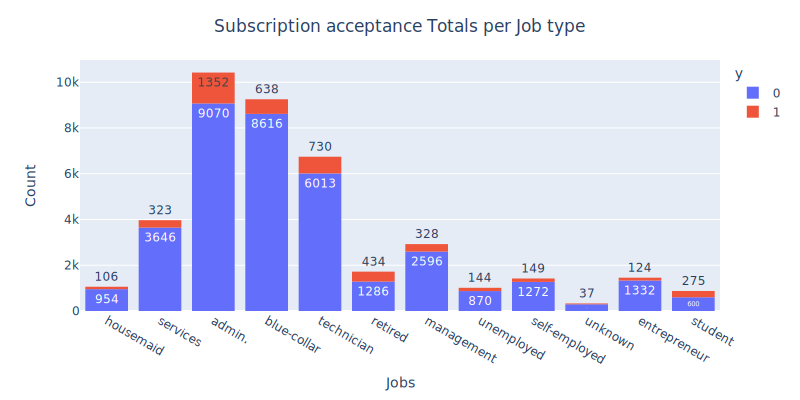

In [14]:
fig = px.histogram(df, x='job', color='y', text_auto=True)
fig.update_layout(title='Subscription acceptance Totals per Job type',
                  title_x=0.5, title_y=0.95,
                  width=800, height=400,
                  yaxis_title='Count',
                  xaxis_title='Jobs')
fig.show()

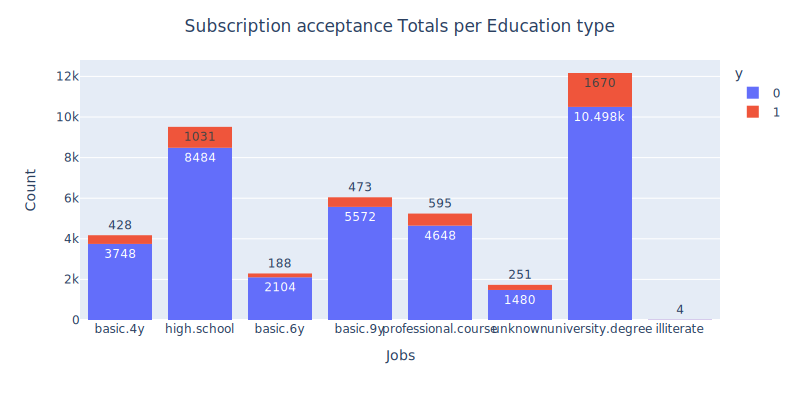

In [15]:
fig = px.histogram(df, x='education', color='y', text_auto=True)
fig.update_layout(title='Subscription acceptance Totals per Education type',
                  title_x=0.5, title_y=0.95,
                  width=800, height=400,
                  yaxis_title='Count',
                  xaxis_title='Jobs')
fig.show()

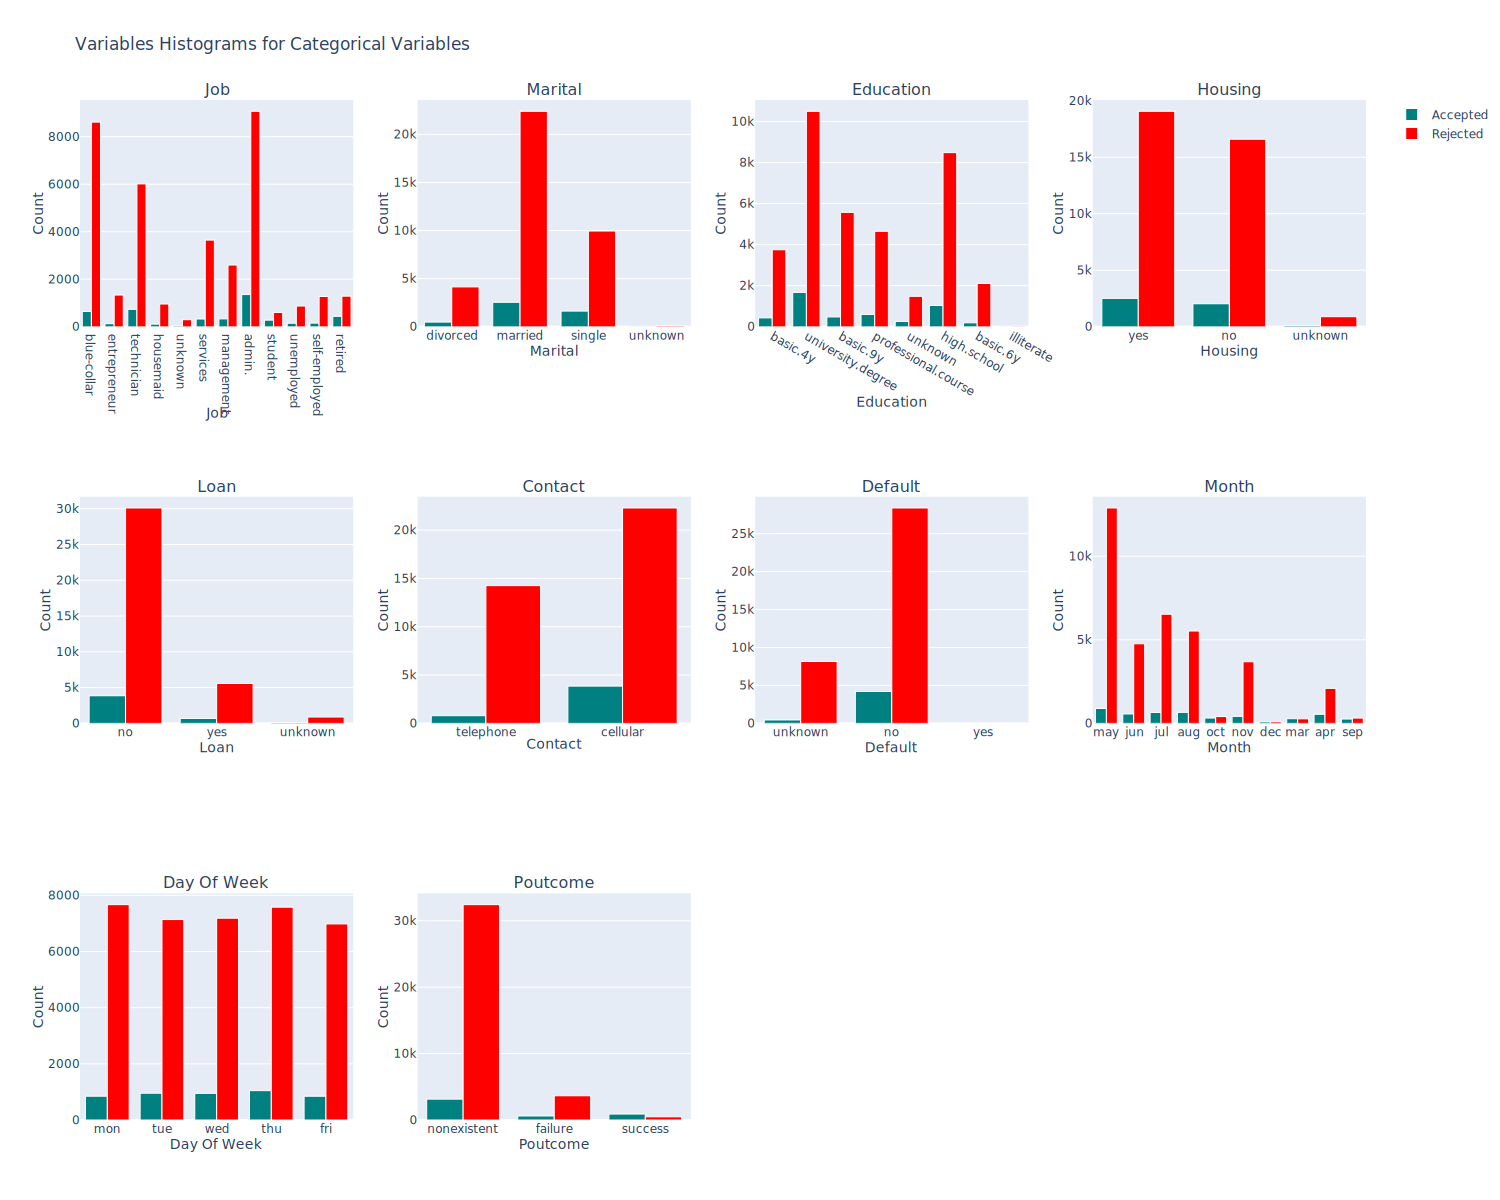

In [16]:
import math
from plotly.subplots import make_subplots

columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'default', 'month', 'day_of_week', 'poutcome']
dimension = math.ceil(np.sqrt(len(columns)))
fig = make_subplots(cols = dimension, rows = dimension -1, subplot_titles=(list(map(lambda x: x.replace('_', " ").title(), columns))))

df_accepted = df.query('y == 1')
df_rejected = df.query('y == 0')

for i, column in enumerate(columns):
    row = math.floor((i + dimension) / dimension)
    col = ((i + dimension) % dimension) + 1
    fig.add_histogram(x = df_accepted[column], row = row, col = col, name='Accepted', marker_color='teal', showlegend=(i==0))
    fig.add_histogram(x = df_rejected[column], row = row, col = col, name='Rejected', marker_color='red', showlegend=(i==0))
    fig['layout'][f'yaxis{i+1}']['title'] = 'Count'
    fig['layout'][f'xaxis{i+1}']['title'] = column.replace('_', " ").title()
    fig['layout'][f'yaxis{i+1}']['title']['standoff'] = 0
    fig['layout'][f'xaxis{i+1}']['title']['standoff'] = 0
    fig.update_traces(marker_line_width=1,marker_line_color="white")
    
    
fig.update_layout(height=1200, width=1500, title_text="Variables Histograms for Categorical Variables")
fig.update_xaxes(type='category')
fig.show()

In [17]:
base_acceptance = round(get_acceptance_rate(df), 3)
print(f'base acceptance rate is: {base_acceptance}')

base acceptance rate is: 0.113


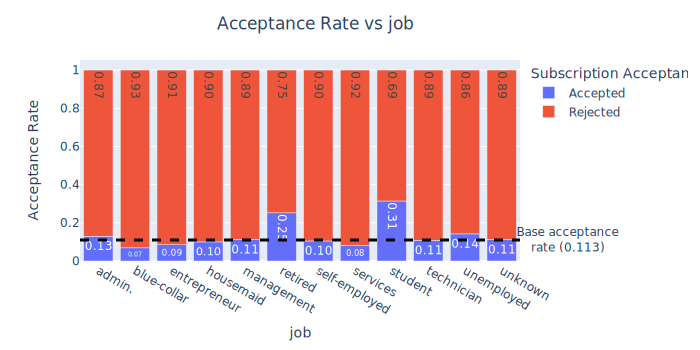

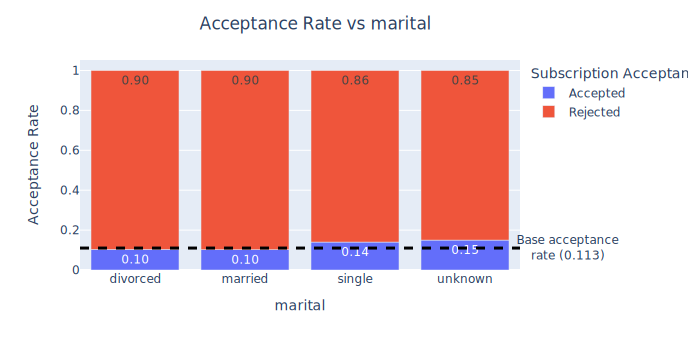

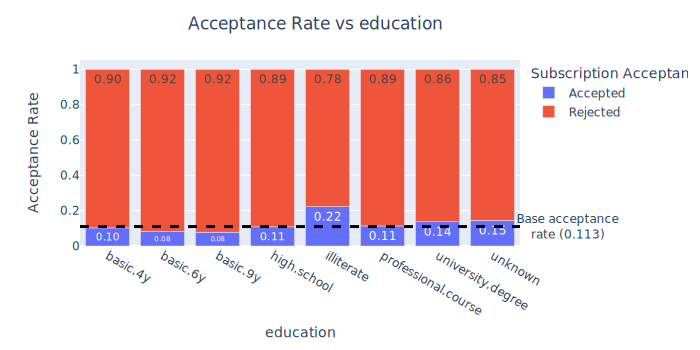

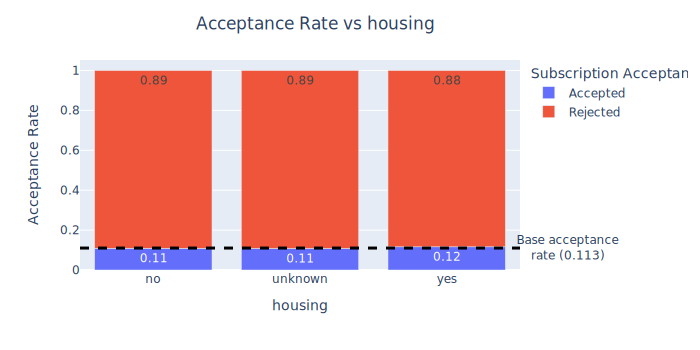

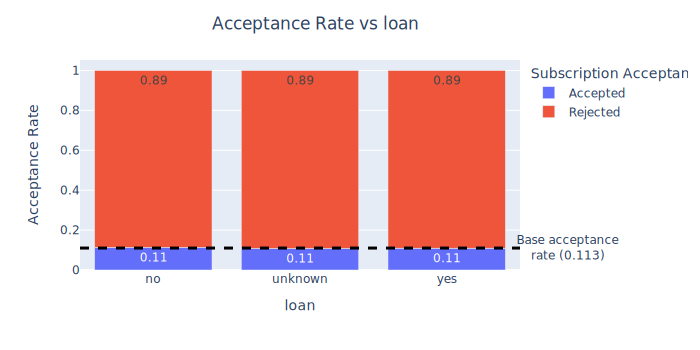

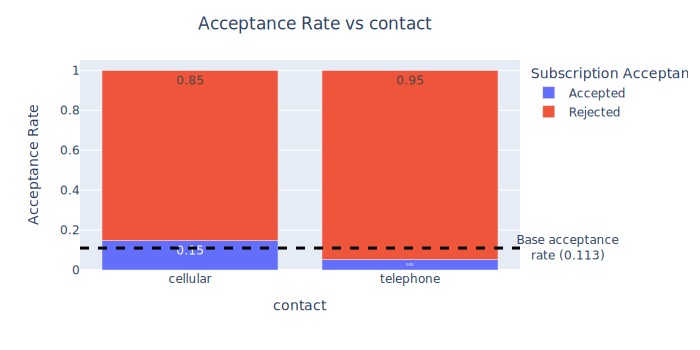

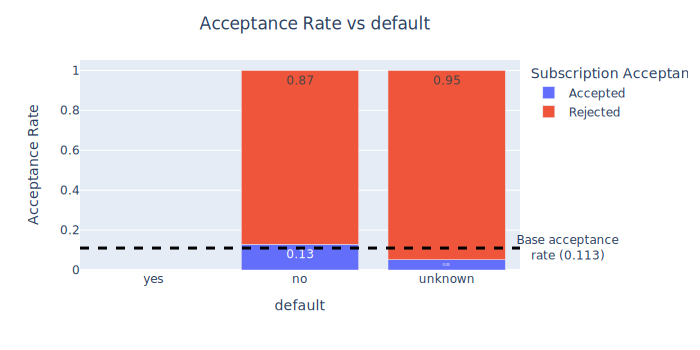

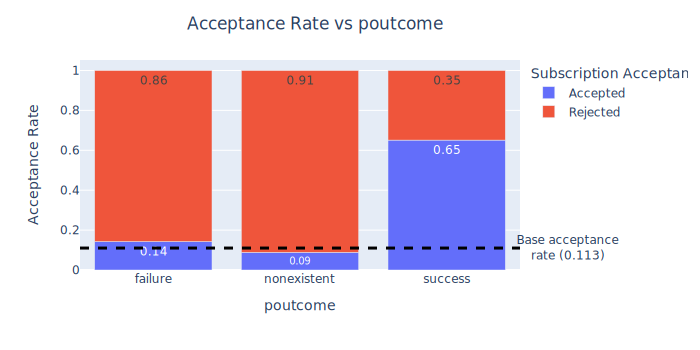

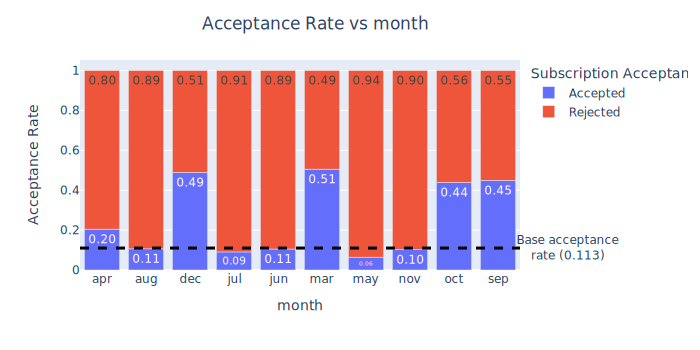

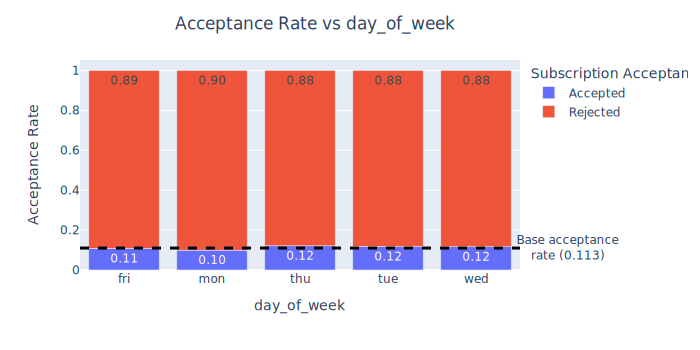

In [18]:
columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'default', 'poutcome','month', 'day_of_week']
for column in columns:
  df_accepted = get_acceptance_dataframe(df, column)

  fig = px.bar(df_accepted, x=df_accepted.index, text_auto='.2f', y=['Accepted',  'Rejected'], labels={'variable': 'Subscription Acceptance'}).update_xaxes(type='category')
  fig.add_hline(y=0.11, line_width=3, line_dash="dash", line_color="black",  annotation_text=f"Base acceptance<br>rate ({base_acceptance})",
                              annotation_position="right")
  fig.update_layout(title=f'Acceptance Rate vs {column}', title_x = 0.45, title_y = 0.95,
                width=700, height=350,
                yaxis_title = 'Acceptance Rate',
                xaxis={'categoryorder':'sum ascending'},
                xaxis_title = column)
  fig.show()

From the above subscription acceptance rate, we can conclude the following:
* Students, retired and unemployed showed higher acceptance rate compared to the base acceptance rate (11%)
* Single customers showed higher acceptance rate compared to the base acceptance rate
* In the months March, September, October and December we observed higher acceptance rate. However, examining the total samples from these months using the histograms above, shows that these months had the lowest sample volume during the year, so it'll be hard to draw definitive conclusions from these numbers
* Customers who previously accepted the marketing campaign, are very likely (%65) to accept the current marketing campaign
* Customers with their credit not in default showed higher acceptance rate compared to the base acceptance rate  

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

The business goal of this task is to find a model that can **best explain success** when the client subscribes the deposit. Such model can **increase campaign efficiency** by identifying the main characteristics that affect success, helping in a better management of the available resources and by selecting high quality and affordable set of potential buying customers .

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [19]:
import pandas as pd
import time

from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [20]:
# columns 1-7
categorical_columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'default']
numerical_columns = ['age']
df.index.name = 'index'

df_ohe = OneHotEncoder(sparse_output=False,dtype=int).set_output(transform='pandas').fit_transform(df[categorical_columns])
df_num = StandardScaler().set_output(transform="pandas").fit_transform(df[numerical_columns])
df_tr = pd.merge(df_num, df_ohe, how='inner', on='index')
print(df_tr.shape)
df_tr.head()

(41188, 36)


,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,default_no,default_unknown,default_yes
index,,,,,,,,,,,,,,,,,,,,,
0,1.533034,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
1,1.628993,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,-0.290186,0,0,0,0,0,0,0,1,0,...,0,1,1,0,0,0,1,1,0,0
3,-0.002309,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,1.533034,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,1,0,0


### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

In [21]:
from sklearn.model_selection import train_test_split
X = df_tr
x_train, x_test, y_train, y_test = train_test_split(df_tr, df['y'], test_size=0.25)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [22]:
# Create anf fit dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(x_train, y_train)

# Predict the labels for the train and test data
y_pred_train = dummy_clf.predict(x_train)
y_pred_test = dummy_clf.predict(x_test)

# Calculate the accuracy score for the train data
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Accuracy score for the train data:", accuracy_train)

# Calculate the accuracy score for the test data
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy score for the test data:", accuracy_test)

Accuracy score for the train data: 0.8870221099996762
Accuracy score for the test data: 0.8883169855297659


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [23]:
from sklearn.linear_model import LogisticRegression
logisticReg = LogisticRegression(max_iter=1000)
logisticReg.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

### Problem 9: Score the Model

What is the accuracy of your model?

In [24]:
y_pred_train_lr = logisticReg.predict(x_train)
y_pred_test_lr = logisticReg.predict(x_test)

print(f'Logistic regression train score: {accuracy_score(y_train, y_pred_train_lr)}')
print(f'Logistic regression test score: {accuracy_score(y_test, y_pred_test_lr)}')

Logistic regression train score: 0.8870221099996762
Logistic regression test score: 0.8883169855297659


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [25]:
# Create a dictionary to store the results
results = {}

x_train, x_test, y_train, y_test = train_test_split(df_tr, df['y'], test_size=0.3)

# Models to test
models = [
    {
        'model': LogisticRegression(max_iter=1000),
        'key': 'Logistic Regression'
    },
    {
        'model': SVC(),
        'key': 'SVM'
    },
    {
        'model': KNeighborsClassifier(),
        'key': 'KNN'
    },
    {
        'model': DecisionTreeClassifier(),
        'key': 'Decision Tree'
    },
]

# fit model and calc accuracy and f1
for model in models:
    print('Analyzing model: ', model['key'])
    mdl = model['model']
    start_t = time.time()
    mdl.fit(x_train, y_train)
    end_t = time.time()
    y_pred_train = mdl.predict(x_train)
    y_pred_test = mdl.predict(x_test)
    key = model['key']
    results[key] = {
        'train_time': end_t - start_t,
        'train_accuracy': accuracy_score(y_train, y_pred_train),
        'test_accuracy': accuracy_score(y_test, y_pred_test),
        'train_f1': f1_score(y_train, y_pred_train, average='weighted', labels=np.unique(y_pred_train)),
        'test_f1': f1_score(y_test, y_pred_test, average='weighted', labels=np.unique(y_pred_test))
    }
    print(classification_report(y_test, y_pred_test, labels=np.unique(y_pred_test)))

# Create a DataFrame to display results
df_results = pd.DataFrame(results).transpose()
df_results.index.name = 'Model'
print(df_results)

Analyzing model:  Logistic Regression
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11007

   micro avg       0.89      1.00      0.94     11007
   macro avg       0.89      1.00      0.94     11007
weighted avg       0.89      1.00      0.94     11007

Analyzing model:  SVM
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     11007
           1       0.44      0.01      0.02      1350

    accuracy                           0.89     12357
   macro avg       0.67      0.50      0.48     12357
weighted avg       0.84      0.89      0.84     12357

Analyzing model:  KNN
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11007
           1       0.31      0.08      0.12      1350

    accuracy                           0.88     12357
   macro avg       0.60      0.53      0.53     12357
weighted avg       0.83      0.88      0.85   

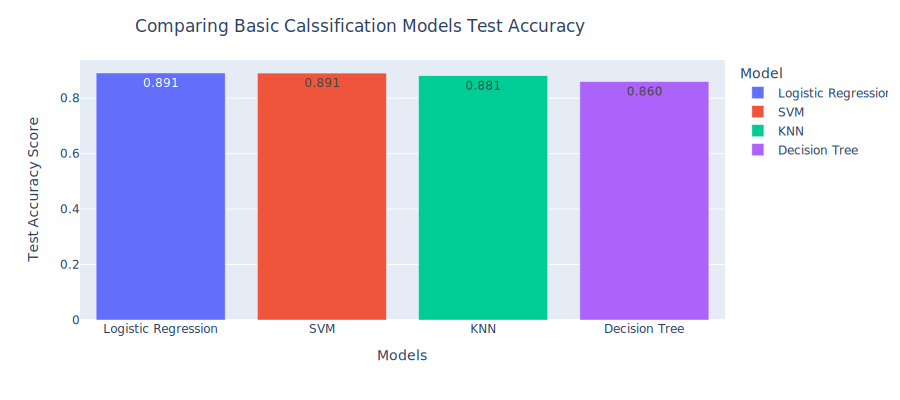

In [26]:
fig = px.bar(df_results, x=df_results.index, y='test_accuracy', text_auto='.3f',
             color=df_results.index, width=900, height=400)
fig.update_layout(title='Comparing Basic Calssification Models Test Accuracy',
                  title_x=0.4, title_y=0.95,
                  yaxis_title='Test Accuracy Score',
                  xaxis_title='Models')
fig.show()

In **imbalanced** data sets as the one that we're analyzing we **should focus on f1 score**, and less on accuracy

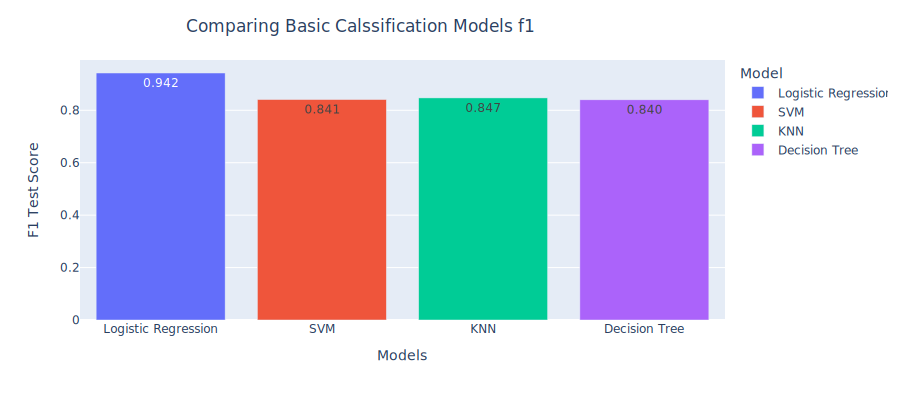

In [27]:
fig = px.bar(df_results, x=df_results.index, y='test_f1', text_auto='.3f',
             color=df_results.index, width=900, height=400)
fig.update_layout(title='Comparing Basic Calssification Models f1',
                  title_x=0.4, title_y=0.95,
                  yaxis_title='F1 Test Score',
                  xaxis_title='Models')
fig.show()

We can see that `Logistic Regression` performed better (0.94 f1 score) than better the rest of the models (0.83-0.84).

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  
For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric


In [28]:
# Add numerical features that we saw that have more correlation to the target `y` earlier
numerical_columns_to_add = ['previous', 'pdays', 'emp.var.rate', 'euribor3m', 'nr.employed']
df_num = StandardScaler().set_output(transform="pandas").fit_transform(df[numerical_columns_to_add])
df_tr_2 = pd.merge(df_num, df_tr, how='inner', on='index')
print(X.shape)
x_train, x_test, y_train, y_test = train_test_split(df_tr_2, df['y'], test_size=0.3)
df_tr_2.head()

(41188, 36)


,previous,pdays,emp.var.rate,euribor3m,nr.employed,age,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,...,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,default_no,default_unknown,default_yes
index,,,,,,,,,,,,,,,,,,,,,
0,-0.349494,0.195414,0.648092,0.71246,0.33168,1.533034,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
1,-0.349494,0.195414,0.648092,0.71246,0.33168,1.628993,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
2,-0.349494,0.195414,0.648092,0.71246,0.33168,-0.290186,0,0,0,0,...,0,1,1,0,0,0,1,1,0,0
3,-0.349494,0.195414,0.648092,0.71246,0.33168,-0.002309,1,0,0,0,...,0,0,1,0,0,0,1,1,0,0
4,-0.349494,0.195414,0.648092,0.71246,0.33168,1.533034,0,0,0,0,...,0,0,0,0,1,0,1,1,0,0


In [29]:
x_train, x_test, y_train, y_test = train_test_split(df_tr_2, df['y'], test_size=0.3)
X.shape

(41188, 36)

In [30]:
import time
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, ConfusionMatrixDisplay


# Dictionary to save the results of the GridSearchCV for the different models 
gs_results = {}

# Hyper params data for GridSearchCV 
models = [
    {
        'model': LogisticRegression(),
        'params': {'max_iter': np.arange(500, 1000, 2000), 'solver': ['liblinear', 'lbfgs']},
        'key': 'Logistic Regression'
    },
    {
        'model': KNeighborsClassifier(),
        'params': {'n_neighbors': [10, 50, 100, 200], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],},
        'key': 'KNN'
    },
    {
        'model': DecisionTreeClassifier(),
        'params': { 'min_impurity_decrease': [0.01, 0.02, 0.03, 0.05],
                    'max_depth': [2, 5, 10],
                    'min_samples_split': [0.1, 0.2, 0.05]},
        'key': 'Decision Tree'
    },
    {
        'model': SVC(),
        'params': {'kernel': ['rbf', 'poly', 'linear'], 'gamma': ['scale', 'auto']},
        'key': 'SVM'
    },
]

best_values = {}
best_models = {}
# GridSearchCV function to test different models
def grid_search(model, grid_params, key):
  print("Performing Grid Search for: ", key)

  grid_search = GridSearchCV(model, grid_params, cv=5, scoring='f1')

  # Fit the grid search object to the data and measure time
  # Create encoder object
  start_t = time.time()
  grid_search.fit(x_train, y_train)
  end_t = time.time()

  # Get the best model and its parameters
  best_model = grid_search.best_estimator_
  best_params = grid_search.best_params_
  best_values[key] = { 'model': best_model, 'params': best_params }

  # Predict the labels for the train and test data
  y_pred_train = best_model.predict(x_train)
  y_pred_test = best_model.predict(x_test)

  # Calculate the scores for the train and test data
  print("Best parameters: ", best_params)
  print("Training time: ", end_t - start_t)
  gs_results[key] = {
    'train_time': end_t - start_t,
    'test_accuracy': accuracy_score(y_test, y_pred_test),
    'test_recall': recall_score(y_test, y_pred_test),
    'test_f1': f1_score(y_test, y_pred_test, average='weighted', labels=np.unique(y_pred_test))
  }
  print(classification_report(y_test, y_pred_test, labels=np.unique(y_pred_test)))
  cm = confusion_matrix(y_test, y_pred_test)
  best_models[key] = { 'model' : best_model, 'cm': cm }
    
for model in models:
  grid_search(model['model'], model['params'], model['key'])
  print(gs_results[model['key']], '\n')


Performing Grid Search for:  Logistic Regression
Best parameters:  {'max_iter': 500, 'solver': 'liblinear'}
Training time:  1.8944690227508545
              precision    recall  f1-score   support

           0       0.91      0.98      0.95     10970
           1       0.64      0.22      0.33      1387

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.64     12357
weighted avg       0.88      0.90      0.88     12357

{'train_time': 1.8944690227508545, 'test_accuracy': 0.8983572064416929, 'test_recall': 0.2198990627253064, 'test_f1': 0.8756470827950626} 

Performing Grid Search for:  KNN
Best parameters:  {'algorithm': 'kd_tree', 'n_neighbors': 50}
Training time:  50.31480026245117
              precision    recall  f1-score   support

           0       0.91      0.99      0.94     10970
           1       0.64      0.20      0.31      1387

    accuracy                           0.90     12357
   macro avg       0.77      0.60      0.63

In [31]:
# Create a DataFrame to display results with GridSearchCV
df_gs_results = pd.DataFrame(gs_results).transpose()
df_gs_results.index.name = 'model'
print(df_gs_results)

                     train_time  test_accuracy  test_recall   test_f1
model                                                                
Logistic Regression    1.894469       0.898357     0.219899  0.875647
KNN                   50.314800       0.897791     0.204758  0.873577
Decision Tree          4.150735       0.887756     0.000000  0.940541
SVM                  233.462635       0.897467     0.206921  0.873577


Although SVM showed the best accuracy (0.898), Decision Tree showed the best f1 score (0.94). For our problem and given the imbalanced data set, it seems like Decision Tree will be the best model, alonside with Logistic Regression that showed earlier a similar 0.94 score.

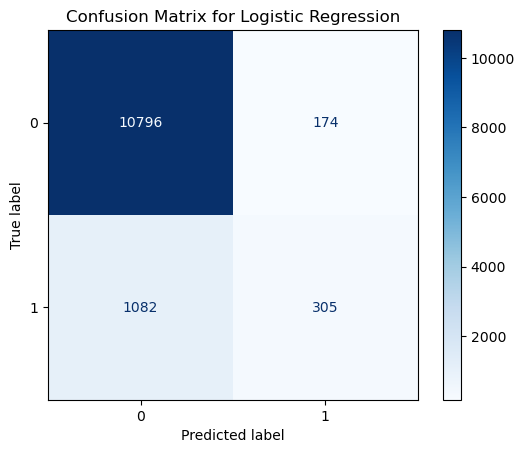

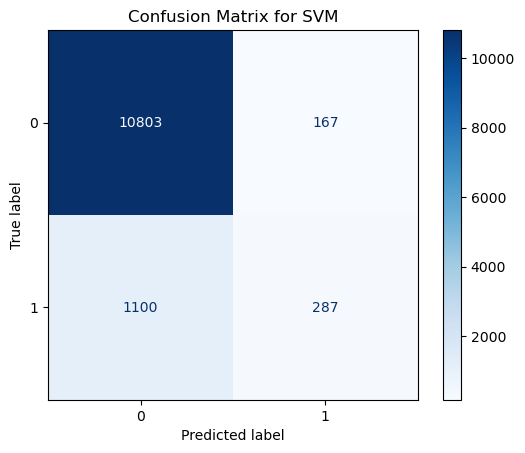

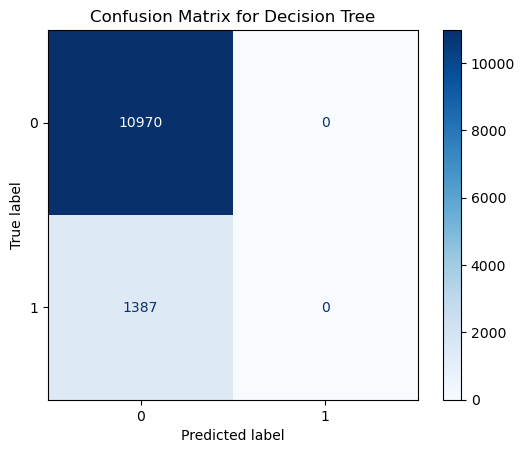

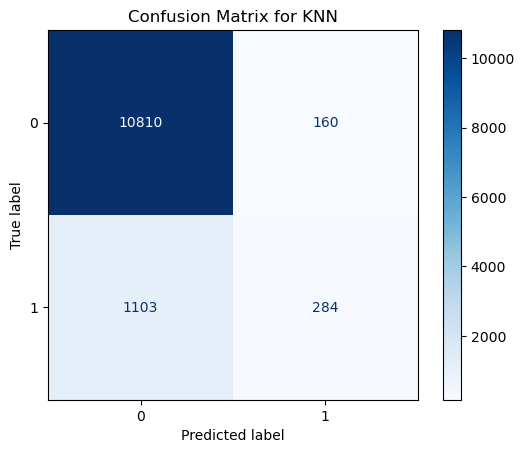

In [32]:
# Display confusion matrix
for model in ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']:
    disp = ConfusionMatrixDisplay(confusion_matrix=best_models[model]['cm'], display_labels=best_models[model]['model'].classes_)
    disp.plot(cmap='Blues', values_format='d')

    plt.title(f'Confusion Matrix for {model}')

    plt.show()

#### Feature Importance

Although we didn't see improvment when adding features for Logistic Regression, it still had an f1-score of 0.94 on a simple model, which puts it side by side with Decision Tree as the leading models. 
##### Decision Tree

In [33]:
feature_importance = pd.DataFrame(best_models['Decision Tree']['model'].feature_importances_, index = x_train.columns, columns = ['importance']).sort_values('importance', ascending = False)
feature_importance[:5]

,importance
nr.employed,1.0
previous,0.0
housing_unknown,0.0
education_basic.6y,0.0
education_basic.9y,0.0


##### Logistic Regression

In [34]:
# re-generating LogisticRegression f1 test score for df_tr data set (feature 1-7) and extracting leading coefs
x_train, x_test, y_train, y_test = train_test_split(df_tr, df['y'], test_size=0.3)
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)
print (f"test_f1 = {f1_score(y_test, y_pred_test, average='weighted', labels=np.unique(y_pred_test))}")

# Get the coefficients of the model
# coefficients = (best_models['Logistic Regression']['model']).coef_[0]
coefficients = model.coef_[0]
# Get the absolute values of the coefficients for importance ranking
absolute_coefficients = np.abs(coefficients)

# Combine feature names with coefficients for better interpretation
feature_coefficients = list(zip(list(x_train.columns), absolute_coefficients))

# Sort features by their importance (absolute coefficient value)
feature_coefficients.sort(key=lambda x: x[1], reverse=True)

# Display the top 10 most important features
print(f"Top 10 most important features:")
for feature, coefficient in feature_coefficients[:10]:
    print(f"{feature}: {coefficient}")

test_f1 = 0.8299274899281488
Top 10 most important features:
job_student: 1.071941242272935
job_retired: 0.5883037268531144
contact_telephone: 0.5297627504644337
default_no: 0.521111269707633
education_illiterate: 0.5158865397493028
contact_cellular: 0.5025709202914025
job_entrepreneur: 0.41394841595012455
job_blue-collar: 0.38805656372197267
default_unknown: 0.3828677439743335
job_services: 0.35326405535951


We can see that customers who held student or retired jobs will lead to higher subscription rate. We could see these trends when analyzing teh ratio of the acceptance rate of job categories. Customers with education reported as illiterate showed higher coef, however there were only 4 samples, so we'll ignore it.

Text(0.5, 1.0, 'Decision Tree Plot')

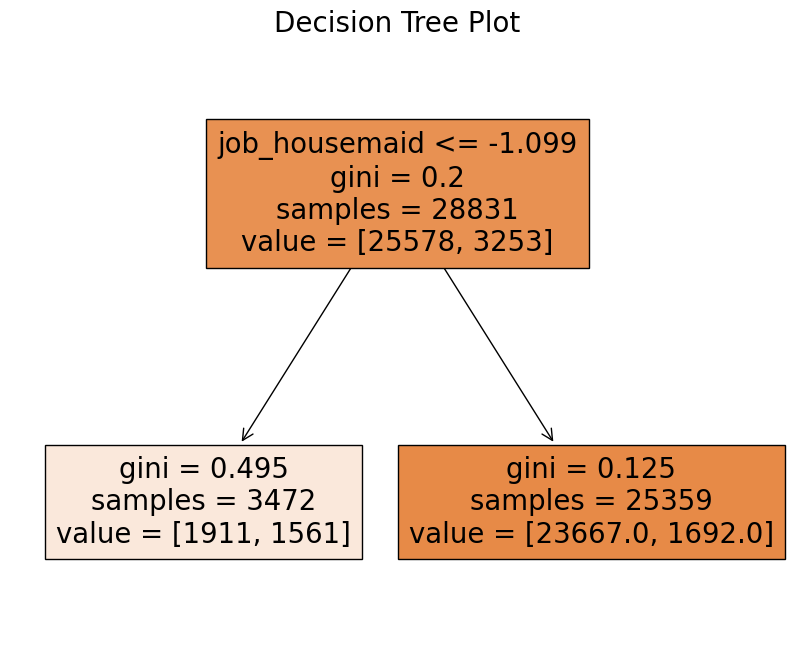

In [35]:
from sklearn import tree

fig = plt.figure(figsize=(10, 8))
tree.plot_tree(best_models['Decision Tree']['model'], feature_names=list(x_train.columns), filled=True)

plt.title("Decision Tree Plot", fontsize=20)

Decision Tree made only 1 split, based on `nr.employed`. 